# Импорт библиотек

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score,recall_score,accuracy_score,fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.exceptions import ConvergenceWarning

# 1. Загрузите данные о диагностике сахарного диабета

In [7]:
df = pd.read_csv('diabetes.csv',sep =',', index_col = False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Разделите эти данные на тестовую и обучающую выборки


In [8]:
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
Counter(y)

Counter({1: 268, 0: 500})

# 3. Постройте модель классификации для определения заболевания

In [10]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('log_reg', LogisticRegression(max_iter = 1000))])

In [11]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 4. Оцените качество модели на тестовой выборке с помощью следующих метрик:
## a) достоверность предсказания (accuracy);
## b) точность (precision);
## c) полнота (recall);


In [12]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [13]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636
F1: 0.6458333333333333
F0.5: 0.7077625570776254
F2: 0.5938697318007662


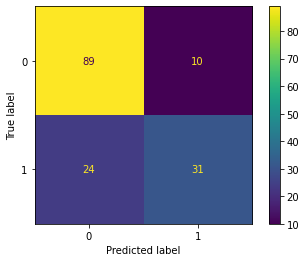

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

# 5. Сделайте вывод о применимости модели.

In [15]:
#В данном случае я бы максимизировал recall так как, на мой взгляд, неправильно предсказать 
#что у человека диабет и отправить его на проверки лучше, чем не предсказать вовсе
#Также нам отлично подойдет f2 мера поскольку она учитывает и precision и recall, но у recall вес больше
#поэтому по двум данным метрикам модель нельзя назвать хорошей

# Дополнительные задания

# 1.Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.


Accuracy: 0.8051948051948052
Precision: 0.8205128205128205
Recall: 0.5818181818181818
F1: 0.6808510638297872
F0.5: 0.7582938388625592
F2: 0.6177606177606176


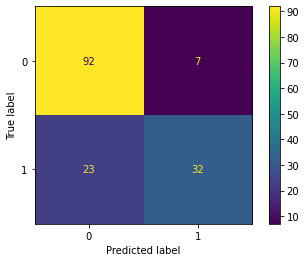

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

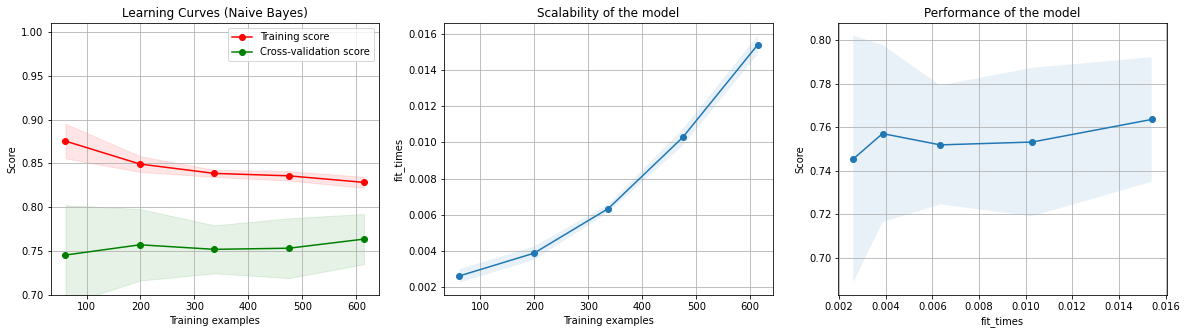

In [16]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('SVC', SVC())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

# 2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.
 

In [ ]:
# f2 лучше у SVC

# 3. Постройте модели классификации на основе следующих методов:
## логистическая регрессия (LogisticRegression);
## метод опорных векторов с линейным ядром (SVC);
## метод опорных векторов с гауссовым ядром (SVC);
## метод k ближайших соседей (KNeighborsClassifier);
## многослойный перцептрон (MLP);
## другие методы по желанию;


In [24]:
metrics = {}

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636
F1: 0.6458333333333333
F0.5: 0.7077625570776254
F2: 0.5938697318007662


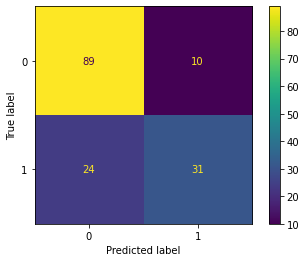

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

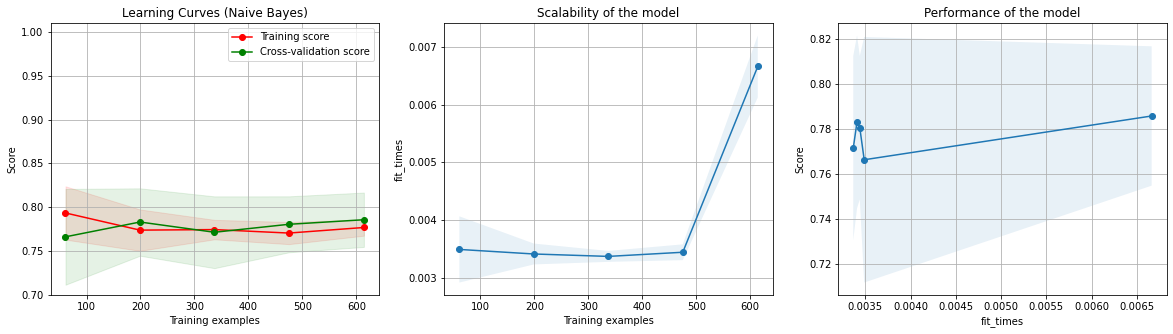

In [25]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', LogisticRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')


metrics['LogReg'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred),
                     'recall':recall_score(y_test, y_pred),
                     'f1':fbeta_score(y_test, y_pred,beta = 1),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5),
                     'f2':fbeta_score(y_test, y_pred,beta = 2)}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636
F1: 0.6458333333333333
F0.5: 0.7077625570776254
F2: 0.5938697318007662


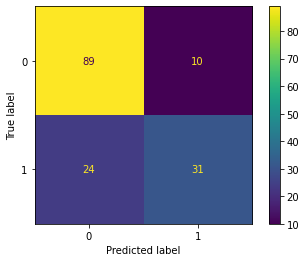

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

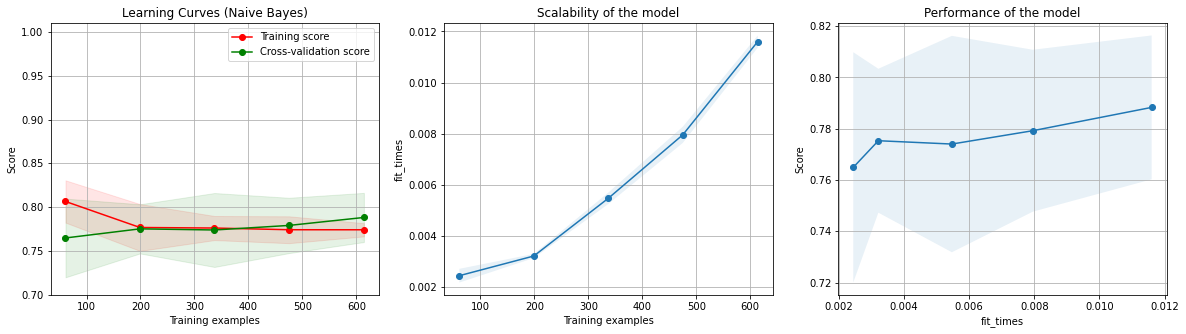

In [26]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel='linear'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

metrics['SVClinear'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred),
                     'recall':recall_score(y_test, y_pred),
                     'f1':fbeta_score(y_test, y_pred,beta = 1),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5),
                     'f2':fbeta_score(y_test, y_pred,beta = 2)}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

Accuracy: 0.8051948051948052
Precision: 0.8205128205128205
Recall: 0.5818181818181818
F1: 0.6808510638297872
F0.5: 0.7582938388625592
F2: 0.6177606177606176


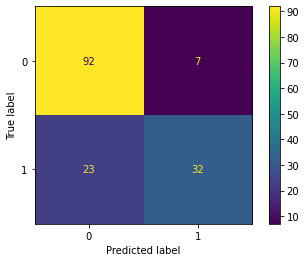

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

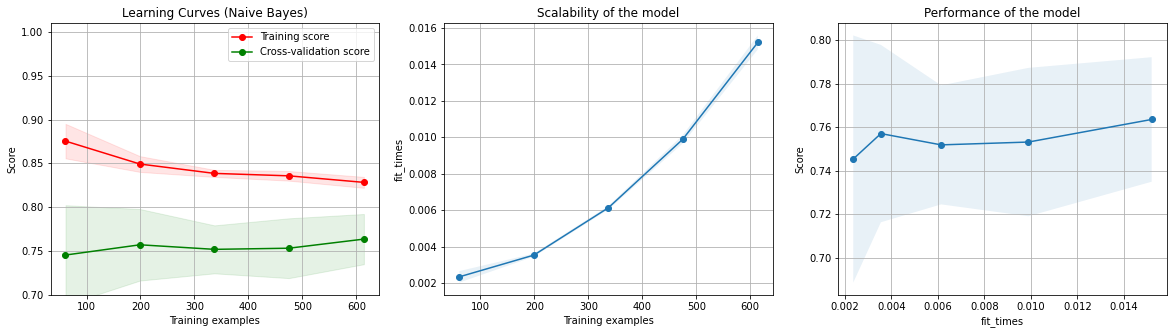

In [27]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel='rbf'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

metrics['SVCgauss'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred),
                     'recall':recall_score(y_test, y_pred),
                     'f1':fbeta_score(y_test, y_pred,beta = 1),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5),
                     'f2':fbeta_score(y_test, y_pred,beta = 2)}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

Accuracy: 0.7987012987012987
Precision: 0.7857142857142857
Recall: 0.6
F1: 0.6804123711340206
F0.5: 0.7399103139013452
F2: 0.6297709923664121


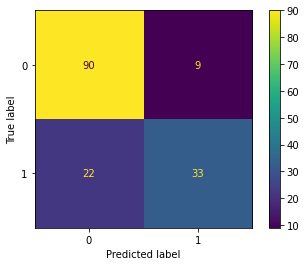

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

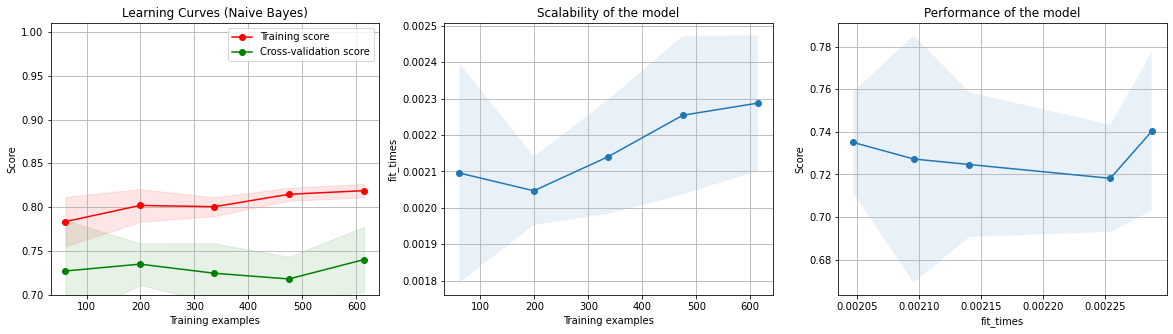

In [28]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', KNeighborsClassifier())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

metrics['KNN'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred),
                     'recall':recall_score(y_test, y_pred),
                     'f1':fbeta_score(y_test, y_pred,beta = 1),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5),
                     'f2':fbeta_score(y_test, y_pred,beta = 2)}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

Accuracy: 0.8051948051948052
Precision: 0.7551020408163265
Recall: 0.6727272727272727
F1: 0.7115384615384616
F0.5: 0.737051792828685
F2: 0.6877323420074348


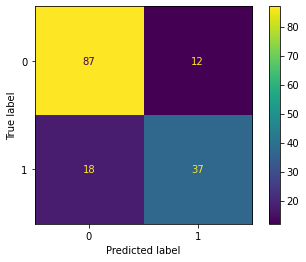

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

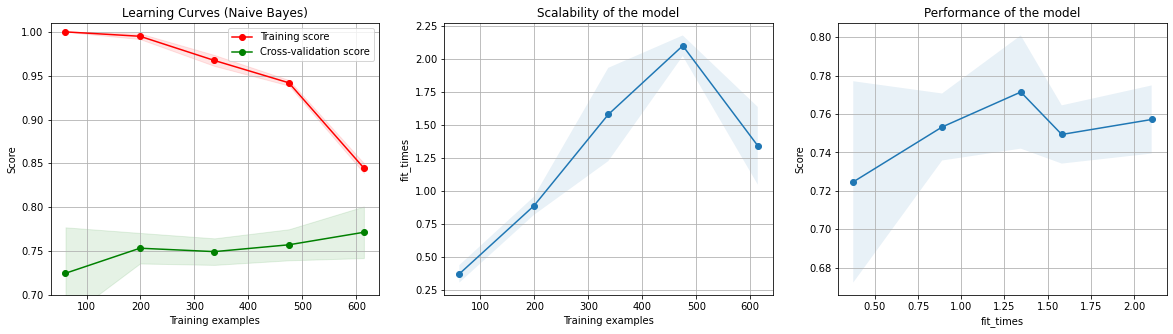

In [29]:
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)



pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', MLPClassifier(max_iter = 1000))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

metrics['MLP'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred),
                     'recall':recall_score(y_test, y_pred),
                     'f1':fbeta_score(y_test, y_pred,beta = 1),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5),
                     'f2':fbeta_score(y_test, y_pred,beta = 2)}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

Accuracy: 0.8181818181818182
Precision: 0.7755102040816326
Recall: 0.6909090909090909
F1: 0.7307692307692308
F0.5: 0.7569721115537849
F2: 0.7063197026022305


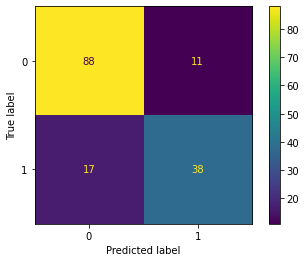

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

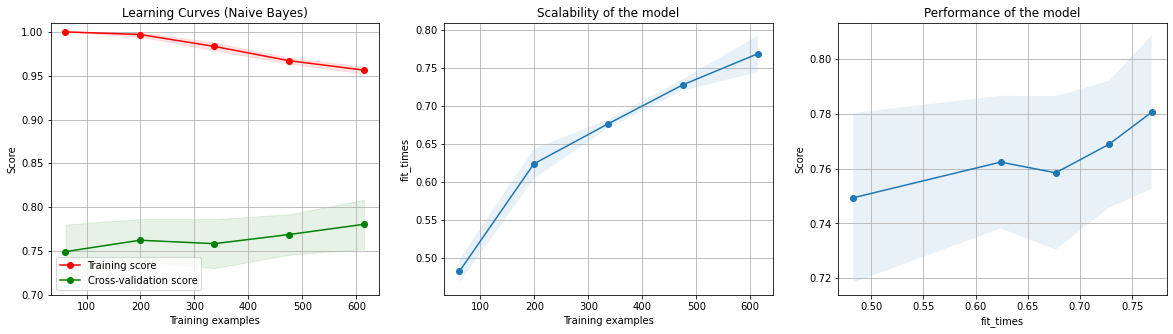

In [30]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', CatBoostClassifier(logging_level = 'Silent'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {fbeta_score(y_test, y_pred,beta = 1)}')
print(f'F0.5: {fbeta_score(y_test, y_pred,beta = 0.5)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

metrics['CatBoost'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred),
                     'recall':recall_score(y_test, y_pred),
                     'f1':fbeta_score(y_test, y_pred,beta = 1),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5),
                     'f2':fbeta_score(y_test, y_pred,beta = 2)}

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

# 4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


In [33]:
pd.DataFrame(metrics)

,LogReg,SVClinear,SVCgauss,KNN,MLP,CatBoost
accuracy,0.779221,0.779221,0.805195,0.798701,0.805195,0.818182
precision,0.756098,0.756098,0.820513,0.785714,0.755102,0.775510
recall,0.563636,0.563636,0.581818,0.600000,0.672727,0.690909
f1,0.645833,0.645833,0.680851,0.680412,0.711538,0.730769
f0.5,0.707763,0.707763,0.758294,0.739910,0.737052,0.756972
f2,0.593870,0.593870,0.617761,0.629771,0.687732,0.706320


In [ ]:
#catboost выдал наибольший recall и f2 меру из всех без тюнинга параметров, из коробки я бы взял его

# 5. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [64]:
model = CatBoostClassifier(logging_level = 'Silent')


l2_leaf_reg = np.linspace(0,6,40)
f2 = []
recall = []
for i in l2_leaf_reg:
    model = CatBoostClassifier(logging_level = 'Silent',
                               l2_leaf_reg = i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f2.append(fbeta_score(y_test, y_pred,beta = 2))
    recall.append(recall_score(y_test, y_pred))

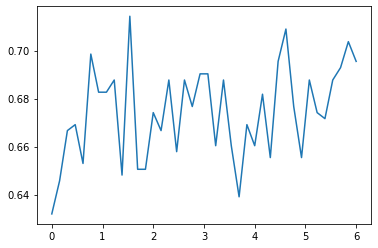

In [65]:
plt.plot(l2_leaf_reg,f2)

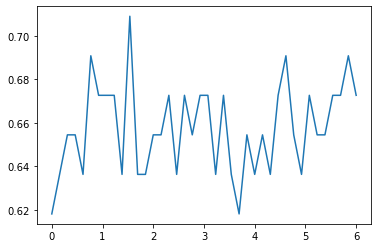

In [66]:
plt.plot(l2_leaf_reg,recall)

In [72]:
l2_leaf_reg[f2.index(max(f2))]

1.5384615384615385

In [ ]:
#наилучшие знчения получаем при параметре l2 регуляризации равному 1.5384...

In [73]:
model = CatBoostClassifier(logging_level = 'Silent',
                               l2_leaf_reg = l2_leaf_reg[f2.index(max(f2))])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F2: {fbeta_score(y_test, y_pred,beta = 2)}')

Recall: 0.7090909090909091
F2: 0.7142857142857143


In [ ]:
#произошел небольшой тюннинг

# 6. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [115]:
from sklearn.datasets import load_iris

In [116]:
X = load_iris()['data']
y = load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
metrics = {}

{'accuracy': 0.9666666666666667, 'precision': 0.9714285714285714, 'recall': 0.9666666666666667, 'f1': 0.9672820512820512, 'f0.5': 0.9693667630986821, 'f2': 0.9664650537634408}


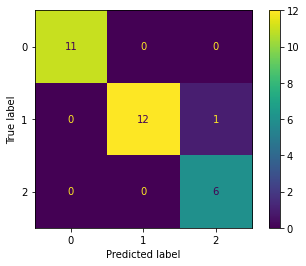

,LogReg
accuracy,0.966667
f0.5,0.969367
f1,0.967282
f2,0.966465
precision,0.971429
recall,0.966667


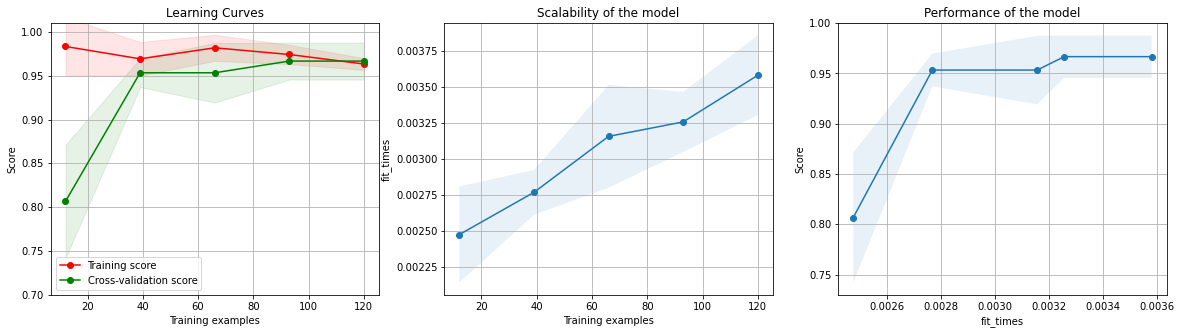

In [117]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', LogisticRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)



metrics['LogReg'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['LogReg'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

# 4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;



#catboost выдал наибольший recall и f2 меру из всех без тюнинга параметров, из коробки я бы взял его

{'accuracy': 0.9666666666666667, 'precision': 0.9714285714285714, 'recall': 0.9666666666666667, 'f1': 0.9672820512820512, 'f0.5': 0.9693667630986821, 'f2': 0.9664650537634408}


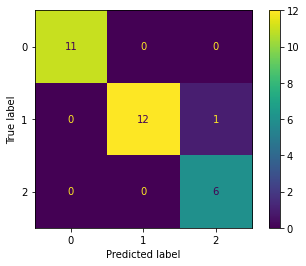

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

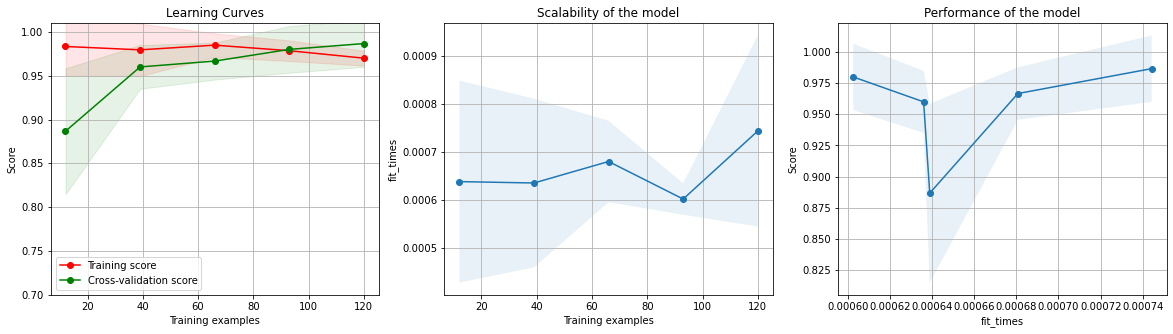

In [118]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel='linear'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


metrics['SVClinear'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['SVClinear'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

{'accuracy': 0.9666666666666667, 'precision': 0.9714285714285714, 'recall': 0.9666666666666667, 'f1': 0.9672820512820512, 'f0.5': 0.9693667630986821, 'f2': 0.9664650537634408}


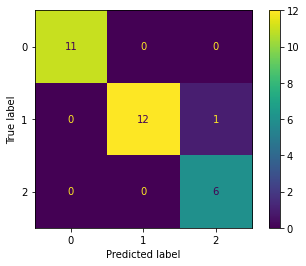

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

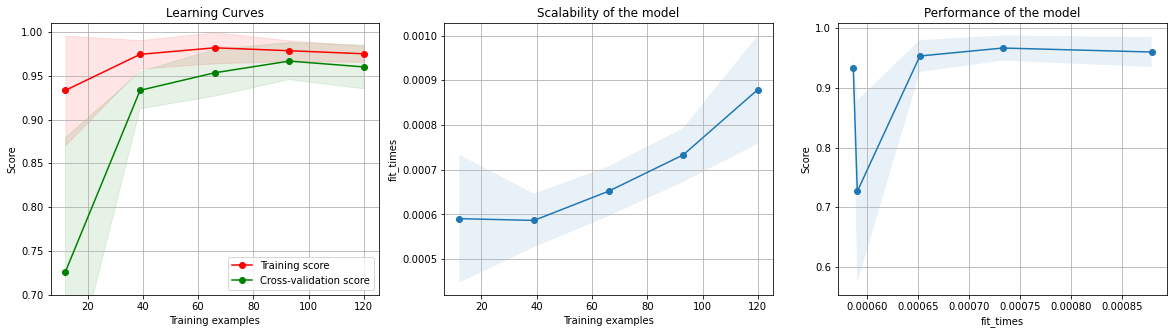

In [119]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel='rbf'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


metrics['SVCgauss'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['SVCgauss'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

{'accuracy': 0.9666666666666667, 'precision': 0.9714285714285714, 'recall': 0.9666666666666667, 'f1': 0.9672820512820512, 'f0.5': 0.9693667630986821, 'f2': 0.9664650537634408}


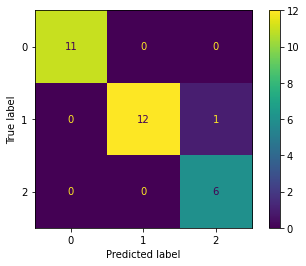

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

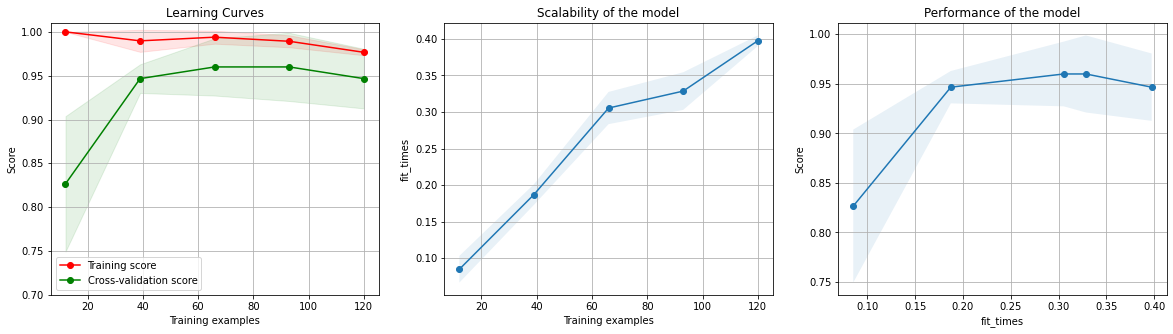

In [120]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', MLPClassifier(max_iter = 1000))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


metrics['MLP'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['MLP'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

{'accuracy': 0.9666666666666667, 'precision': 0.9714285714285714, 'recall': 0.9666666666666667, 'f1': 0.9672820512820512, 'f0.5': 0.9693667630986821, 'f2': 0.9664650537634408}


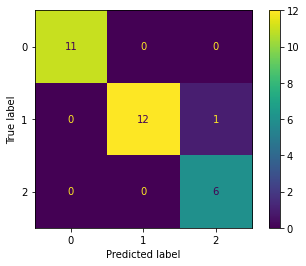

<module 'matplotlib.pyplot' from '/Users/blarno/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

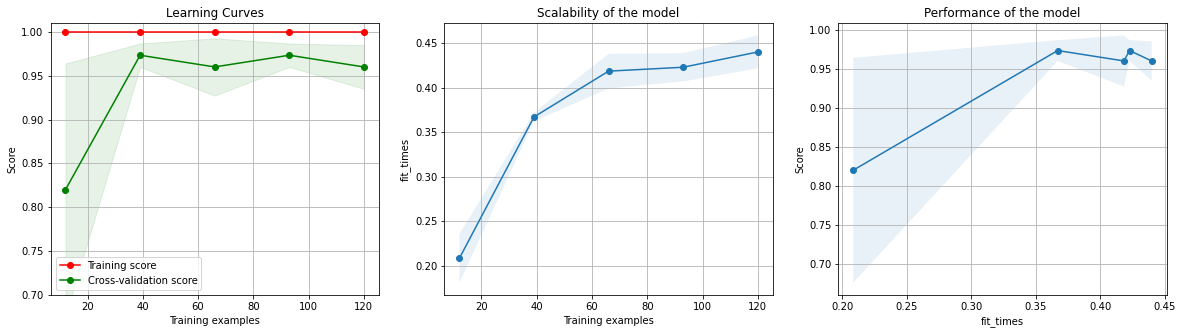

In [121]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('model', CatBoostClassifier(logging_level = 'Silent'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


metrics['CatBoost'] = {'accuracy':accuracy_score(y_test, y_pred),
                     'precision':precision_score(y_test, y_pred, average='weighted'),
                     'recall':recall_score(y_test, y_pred,average='weighted'),
                     'f1':fbeta_score(y_test, y_pred,beta = 1, average ='weighted'),
                     'f0.5':fbeta_score(y_test, y_pred,beta = 0.5, average ='weighted'),
                     'f2':fbeta_score(y_test, y_pred,beta = 2, average ='weighted')}

print(metrics['CatBoost'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=pipeline.classes_)
disp.plot()
plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves"
plot_learning_curve(
    pipeline, X = X,y = y, title = title, ylim=(0.7, 1.01), cv = cv
)

In [122]:
pd.DataFrame(metrics)

,LogReg,SVClinear,SVCgauss,MLP,CatBoost
accuracy,0.966667,0.966667,0.966667,0.966667,0.966667
precision,0.971429,0.971429,0.971429,0.971429,0.971429
recall,0.966667,0.966667,0.966667,0.966667,0.966667
f1,0.967282,0.967282,0.967282,0.967282,0.967282
f0.5,0.969367,0.969367,0.969367,0.969367,0.969367
f2,0.966465,0.966465,0.966465,0.966465,0.966465


In [142]:
model = CatBoostClassifier(logging_level = 'Silent')


grid = {'learning_rate': [0.03,0.05,0.07,0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': range(1,8)}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.0050931	best: 0.0050931 (0)	total: 478ms	remaining: 39.6s
1:	loss: 0.0030230	best: 0.0030230 (1)	total: 907ms	remaining: 37.2s
2:	loss: 0.0019789	best: 0.0019789 (2)	total: 1.54s	remaining: 41.7s
3:	loss: 0.0016443	best: 0.0016443 (3)	total: 1.97s	remaining: 39.5s
4:	loss: 0.0095829	best: 0.0016443 (3)	total: 2.56s	remaining: 40.4s
5:	loss: 0.0053993	best: 0.0016443 (3)	total: 2.98s	remaining: 38.7s
6:	loss: 0.0035734	best: 0.0016443 (3)	total: 3.42s	remaining: 37.6s
7:	loss: 0.0024769	best: 0.0016443 (3)	total: 3.92s	remaining: 37.2s
8:	loss: 0.0130307	best: 0.0016443 (3)	total: 4.36s	remaining: 36.3s
9:	loss: 0.0074761	best: 0.0016443 (3)	total: 4.86s	remaining: 36s
10:	loss: 0.0050737	best: 0.0016443 (3)	total: 5.31s	remaining: 35.2s
11:	loss: 0.0033393	best: 0.0016443 (3)	total: 5.79s	remaining: 34.7s
12:	loss: 0.0163286	best: 0.0016443 (3)	total: 6.2s	remaining: 33.9s
13:	loss: 0.0091216	best: 0.0016443 (3)	total: 6.7s	remaining: 33.5s
14:	loss: 0.0063459	best: 0.001644

In [143]:
grid_search_result

{'params': {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
     

In [147]:
model = CatBoostClassifier(logging_level = 'Silent', depth = 4, l2_leaf_reg = 1,learning_rate = 0.1)

In [148]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
fbeta_score(y_test, y_pred,beta = 2, average ='weighted')

0.9664650537634408